# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2024/)    
## 1MS041, 2024 
&copy;2024 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Random Variables

## Random Variables

A random variable is a <mark>mapping</mark> from the sample space $\Omega$ to the set of real numbers $\mathbb{R}$. In other words, it is a numerical value determined by the outcome of the experiment.

$$
\{\Omega\} \rightarrow \mathbb{R}
$$

We already saw *discrete random variables* that take values in a discrete set, of two types:

- those with with finitely many values, eg. the two values in $\{0,1\}$ for the Bernoulli $(\theta)$ RV 
- those with *countably infinitely many* values, eg. values in the set of all non-negative integers: $\{0,1,2,\ldots\}$, for the 'infinite coin tossing experiment' that records the number of consecutive 'Tails' you see before the first 'Heads' occurs.

Very often in data science there will be **discrete** random variables, often labels of things or indication of presence or absence of something, or simply just the number of things.

Lets use the computer to simulate a random variable, lets choose a fair coin with $0$ is tails and $1$ is heads.

In [1]:
from random import randint
X = lambda : randint(0,1) # makes a random choice between 0 and 1

Each time we observe `X` it will provide a new value, in this document that means we execute `X`

In [2]:
for i in range(10):
    print(X())

1
0
1
0
1
1
1
0
0
1


$X$ is the random variable, it does not have a value, but it is a function. Each time we execute it we "provide" a **new** $\omega$ and get a new observation $X(\omega)$, but the computer "hides" the $\omega$.

### Distribution function

According to the definition in the lecture notes given a real valued random variable $X: \Omega \to R$ we assign probability to the random variable as follows

$$
    F(x):=P(X \leq x) = P(X^{[-1]}((-\infty,x])) = P(\{\omega: X(\omega) \leq x\})
$$

Let us consider the random variable $X$ from the spam/ham example and sms texts. In this case $X$ can only take two values, namely $0$ and $1$. In this case $X$ was a function from the text to a number, so the set

$$
    \{\omega \in \Omega: X(\omega) \leq 0\} = \{\omega \in \Omega: X(\omega) = 0\} = \{\text{all non spam texts}\}.
$$

and

$$
    \{\omega \in \Omega: X(\omega) \leq 1\} = \{\omega \in \Omega: X(\omega) = 1 \text{ or } 0\} = \{\text{all spam and non spam texts}\}.
$$

#### You try ...

What is $\{\omega \in \Omega: X(\omega) \leq -1\}$?

> **Answer:** As the random variable X is forced to be less than or equal to -1, events $\omega$ that fulfill this condition, while being in the sample space (0,1) are none, hence empty set $\{\phi\}$ is yielded.

Lets take a look at some distribution functions and what we can do with them.

First up is the example above, lets plot the distribution function

In [15]:
from Utils import plotEMF

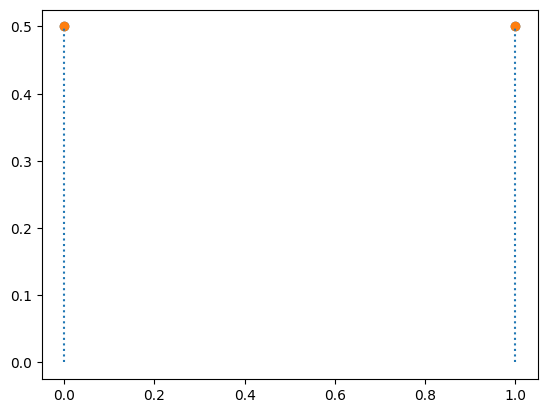

In [17]:
plotEMF([(0,1/2),(1,1/2)]) # Empirical Mass Function

In [18]:
from Utils import plotEDF,emfToEdf
import numpy as np

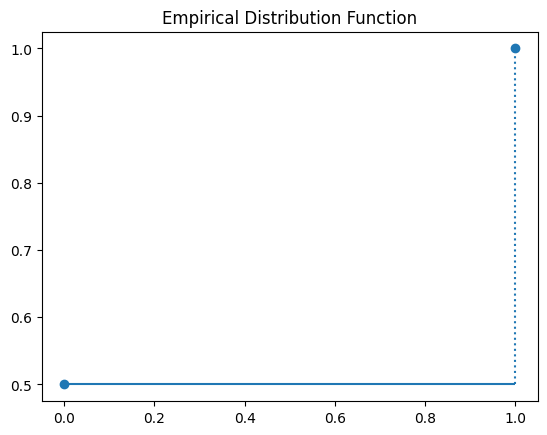

In [19]:
plotEDF(emfToEdf([(0,1/2),(1,1/2)])) # Empirical Distribution Function

### The $de~Moivre(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ RV

We have seen that a $Bernoulli(\theta)$ RV has two outcomes (0 and 1).  What if we are interested in modelling situations where there are more than two outcomes of interest? For example, we could use a $Bernoulli(\frac{1}{2})$ RV to model whether the outcome of the flip of a fair coin is a head, but we can't use it for modelling a RV which is the number we get when we toss a six-sided die.  

So, now, we will consider a natural generalization of the $Bernoulli(\theta)$ RV with more than two outcomes. This is called the $de~Moivre(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ RV (after Abraham de Moivre, 1667-1754), one of the first great analytical probabalists).  

> A $de~Moivre(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ RV $X$ has a discrete uniform distribution over $\{1, 2, ..., k\}$:  there are $k$ possible equally probable or *equiprobable* values that the RV can take. 

If we are rolling a die that is a cube with six faces and $X$ is the number on the face of the die that touches the floor upon coming to a stop, then 

$k=6$. 

Or think of the New Zealand Lotto game. 

> There are 40 balls in the machine, numbered $1, 2, \ldots, 40$.  The number on the first ball out of the machine can be modelled as a de Moivre $(\frac{1}{40}, \frac{1}{40}, \ldots, \frac{1}{40})$ RV. 

We say that an RV $X$ is de Moivre $(\frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k})$ distributed if its probability mass function PMF is:

$$
f \left(x; \left( \frac{1}{k}, \frac{1}{k}, \ldots, \frac{1}{k} \right) \right) = \begin{cases} 0 & \quad \text{if } x \notin \{1,2,\ldots,k\}\\ \frac{1}{k} & \quad \text{if } x \in \{1,2,\ldots,k\} \end{cases}
$$

We can find the expectation: 

$$
\begin{array}{lcl} E(X) & = & \sum_{x=1}^k xP(X=x)\\ &=& (1 \times \frac{1}{k}) + (2 \times \frac{1}{k}) + \ldots + (k \times \frac{1}{k})\\ &=& (1 + 2 + \dots + k)\frac{1}{k}\\ &=& \frac{k(k+1)}{2}\frac{1}{k}\\ &=& \frac{k+1}{2} \, , \end{array}
$$


the second moment: 

$$
\begin{array}{lcl} E(X^2) & =& \sum_{x=1}^k x^2P(X=x)\\ & =& (1^2 \times \frac{1}{k}) + (2^2 \times \frac{1}{k}) + \ldots + (k^2 \times \frac{1}{k})\\ &=& (1^2 + 2^2 + \dots + k^2)\frac{1}{k}\\ &=& \frac{k(k+1)(2k+1)}{6}\frac{1}{k}\\ &=& \frac{2k^2+3k+1}{6}\, , \end{array}
$$


and finally the variance: 

$$
\begin{array}{lcl} V(X) &=& E(X^2) - \left(E(X)\right)^2\\ &=& \frac{2k^2+3k+1}{6} - \left( \frac{k+1}{2} \right)^2\\ &=&\frac{2k^2+3k+1}{6} - \frac{k^2 + 2k +1}{4}\\ &=& \frac{4(2k^2 + 3k + 1) - 6(k^2 + 2k + 1) }{24}\\ &=& \frac{8k^2 + 12k + 4 - 6k^2 - 12k - 6 }{24}\\ &=& \frac{2k^2-2}{24} \\ &=& \frac{k^2-1}{12} \, . \end{array}
$$


For a physical analog for a $k$-sided die consider the generalisation 
  - of a coin with two faces  
  - to a toblerone bar with three sides, 
  - to a k-sided [regular polygon](https://en.wikipedia.org/wiki/Regular_polygon) *that is extended along the third dimension* so it can be rolled and we can define the outcome of the experiment to be the label of the face that touches the flat surface after coming to rest where the labels are in the set $\{1,2,\ldots,k\}$.

We can simulate a deMoivre(1/40...) random variable, by again using `randint`

In [20]:
from random import randint
Y = lambda : randint(1,40) # This is a deMoivre RV as now the number of outcomes is greater than 2

In [21]:
for i in range(10):
    print(Y())

31
23
33
10
11
34
5
2
9
1


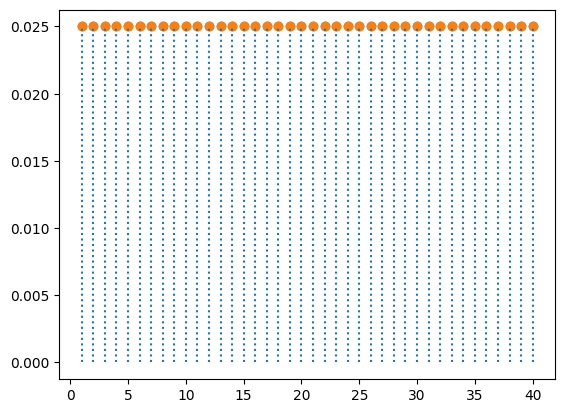

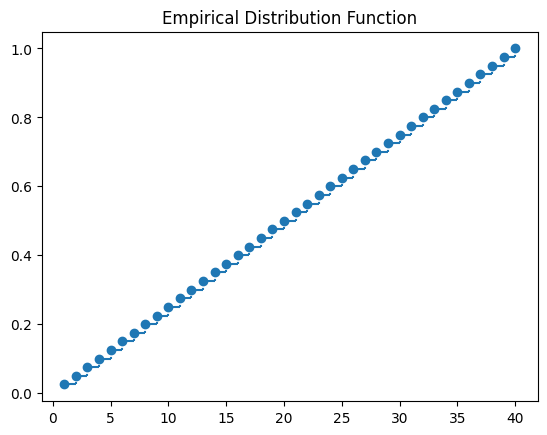

In [23]:
# Lets see how the mass function and the distribution function looks like
# for the deMoivre(1/40,...,1/40) i.e. 40 different outcomes, all with
# the same probability
from Utils import emfToEdf,plotEMF
deMoivre = [(i,1/40) for i in range(1,41)]
plotEMF(deMoivre) # This should essentially be similar to a uniform distribution
plotEDF(emfToEdf(deMoivre)) # This should be the indefinite integral of the above plot 
# --> y = 0.025 <-EMF ... y = integral of 0.025 = 0.025x <-EDF

If you want to see the code to produce the plots, check the file Utils.py

## Learning from data

Often we do not have access to the real distribution function but we have access to observations of the random variable. Lets simulate

In [24]:
# Assume we have 1000 observations of the random variable Y above
Y_obs = [Y() for i in range(1000)]

From the observations, we can estimate the probability of each value by counting how often they occured. This can be found in the makeEMF function

In [25]:
from Utils import makeEMF

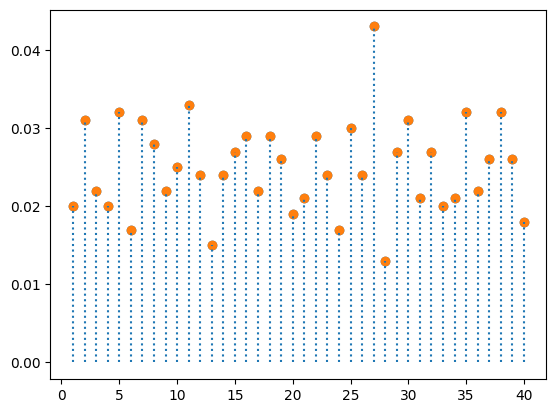

In [26]:
plotEMF(makeEMF(Y_obs))

As we can see from the plot above, it really does not look like the theoretical one. 

> But this is due to random chance. If we had more observations we would expect that the above is closer to theoretical.

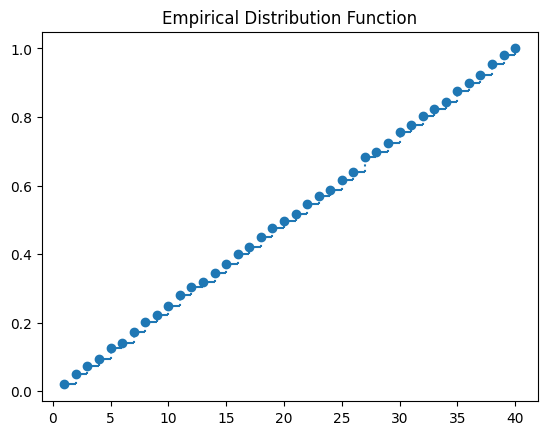

In [28]:
from Utils import makeEDF
plotEDF(makeEDF(Y_obs))

This certainly looks closer to the theoretical distribution function. **It is a good idea to keep this in mind in the future, as this is a fundamental fact!!**

We can also plot the example from the previous notebook, concerning the relative frequencies of the alphabet

In [29]:
alphaspace = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q',
              'R','S','T','U','V','W','X','Y','Z']
alphaRelFreqs = [73/1000,9/1000,30/1000,44/1000,130/1000,28/1000,16/1000,35/1000,74/1000,
                 2/1000,3/1000,35/1000, 25/1000,78/1000,74/1000,27/1000,3/1000,77/1000,63/1000,
                 93/1000,27/1000,13/1000,16/1000,5/1000,19/1000,1/1000]

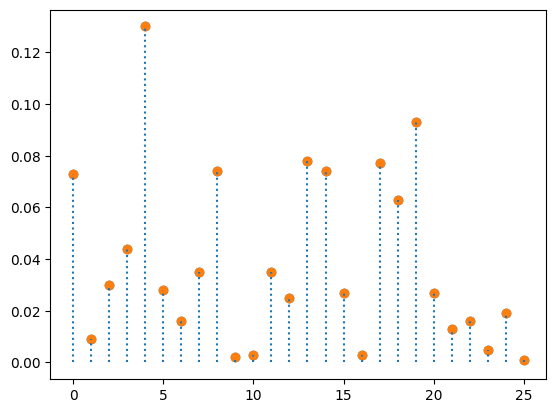

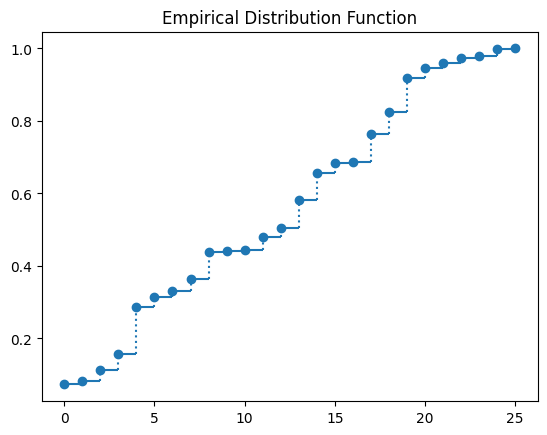

In [30]:
# If we identify 0->A, 1->B etc. we can plot it as
plotEMF(list(enumerate(alphaRelFreqs)))
plotEDF(emfToEdf(list(enumerate(alphaRelFreqs))))

### Continuous random variable

When a random variable takes on values in the continuum we call it a continuous RV.

#### Examples

- Volume of water that fell on the Southern Alps yesterday (See video link below)
- Vertical position above sea level, in micrometers, since the original release of a pollen grain at the head waters of a river
- Resting position in degrees of a roulettet wheel after a brisk spin

### Probability Density Function

A RV $X$ with DF $F$ is called continuous if there exists a piece-wise continuous function $f$, called the  probability density function (PDF) $f$ of $X$, such that, for any $a$, $b \in \mathbb{R}$ with $a < b$,

$$
P(a < X \le b) = F(b)-F(a) = \int_a^b f(x) \ dx \ .
$$


The following hold for a continuous RV $X$ with PDF $f$:

For any $x \in \mathbb{R}$, $P(X=x)=0$.
Consequentially, for any $a,b \in \mathbb{R}$ with $a \le b$ 
$$P(a < X < b ) = P(a < X \le b) = P(a \leq X \le b) = P(a \le X < b)$$

And of course $f$ must satisfy:
$$\int_{-\infty}^{\infty} f(x) \ dx = P(-\infty < X < \infty) = 1$$


#### You try at home
Watch the Khan Academy [video about probability density functions](https://youtu.be/Fvi9A_tEmXQ) to warm-up to the meaning behind the maths above. Consider the continuous random variable $Y$ that measures the exact amount of rain tomorrow in inches. Think of the probability space $(\Omega,\mathcal{F},P)$ underpinning this random variable $Y:\Omega \to \mathbb{Y}$. Here the sample space, range or support of the random variable $Y$ denoted by $\mathbb{Y} = [0,\infty) =\{y : 0 \leq y < \infty\}$.

In [31]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht) 
showURL('https://en.wikipedia.org/wiki/Integral',600)

### The Uniform $(0,1)$ RV

The Uniform $(0,1)$ RV is a continuous RV with a probability density function (PDF) that takes the value 1 if $x \in [0,1]$ and $0$ otherwise.  Formally, this is written  



\begin{equation}
f(x) = \mathbf{1}_{[0,1]}(x) =
\begin{cases}
1 & \text{if } 0 \le x \le 1 ,\\
0 & \text{otherwise}
\end{cases}
\end{equation}


and its distribution function (DF) or cumulative distribution function (CDF) is:



\begin{equation}
F(x) := \int_{- \infty}^x f(y) \ dy =
\begin{cases}
0 & \text{if } x < 0 , \\
x & \text{if } 0 \le x \leq 1 ,\\
1 & \text{if } x > 1
\end{cases}
\end{equation}


Note that the DF is the identity map in $[0,1]$. 

The PDF, CDF and inverse CDF for a Uniform $(0,1)$ RV are shown below

<img src="images/Uniform01ThreeCharts.png" alt="Uniform01ThreeCharts" width=500>

The Uniform $(0,1)$ is sometimes called the Fundamental Model.

The Uniform $(0,1)$ distribution comes from the Uniform$(a,b)$ family.   


\begin{equation}
f(x) = \mathbf{1}_{[a,b]}(x) =
\begin{cases}
\frac{1}{(b-a)} & \text{if } a \le x \le b,\\
0 & \text{otherwise}
\end{cases}
\end{equation}


This is saying that if $X$ is a Uniform $(a,b)$ RV, then all values of $x$ between $a$ and $b$, i.e., $a \le x \le b$, are equally probable.   

The Uniform $(0,1)$ RV is the member of the family where $a=0$, $b=1$.    

 The PDF and CDF for a Uniform $(a,b)$ RV are shown from wikipedia below

<table style="width:95%">
  <tr>
    <th><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/96/Uniform_Distribution_PDF_SVG.svg/500px-Uniform_Distribution_PDF_SVG.svg.png" alt="500px-Uniform_Distribution_PDF_SVG.svg.png" width=250></th>
    <th><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/63/Uniform_cdf.svg/500px-Uniform_cdf.svg.png" alt="wikipedia image 500px-Uniform_cdf.svg.png" width=250></th> 
  </tr>
</table>

You can dive deeper into this family of random vaiables <a href="https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)">here</a>.

Python has a function for simulating samples from a Uniform $(a,b)$ distribution.  We will learn more about this later in the course. Let's go ahead and use it to simulate samples from it below.

In [53]:
from random import uniform

In [54]:
print(uniform(-1,1))  # reevaluate the cell to see how the samples change upon each re-evaluation

-0.6309668281756808


### Expectations

The *expectation* of $X$ is also known as the *population mean*, *first moment*, or *expected value* of $X$.


\begin{equation}
E\left(X\right) := \int x \, dF(x) =
\begin{cases}
\sum_x x \, f(x) & \qquad \text{if }X \text{ is discrete} \\
\int x \, f(x)\,dx  & \qquad \text{if } X \text{ is continuous}
\end{cases}
\end{equation}

Sometimes, we denote $E(X)$ by $E X$ for brevity.  Thus, the expectation is a single-number summary of the RV $X$ and may be thought of  as the average.

In general though, we can talk about the Expectation of a function $g$ of a RV $X$.  

The Expectation of a function $g$ of a RV $X$ with DF $F$ is:


\begin{equation}
E\left(g(X)\right) := \int g(x)\,dF(x) =
\begin{cases}
\sum_x g(x) f(x) & \qquad \text{if }X \text{ is discrete} \\
\int g(x) f(x)\,dx  & \qquad \text{if } X \text{ is continuous}
\end{cases}
\end{equation}


provided the sum or integral is well-defined.  We say the expectation exists if


\begin{equation}
\int \left|g(x)\right|\,dF(x) < \infty \ .
\end{equation}

When we are looking at the Expectation of $X$ itself, we have $g(x) = x$

Thinking about the Expectations like this, can you see that the familiar Variance of X is in fact the Expection of $g(x) = (x - E(X))^2$?

The variance of $X$ (a.k.a. second moment)

Let $X$ be a RV with mean or expectation $E(X)$.  The variance of $X$ denoted by $V(X)$ or $VX$ is

$$
V(X) := E\left((X-E(X))^2\right) = \int (x-E(X))^2 \,d F(x)
$$

provided this expectation exists.  The standard deviation denoted by $\sigma(X) := \sqrt{V(X)}$.

Thus variance is a measure of ``spread'' of a distribution.

The $k$-th moment of a RV comes from the Expectation of $g(x) = x^k$.

We call

$$
E(X^k) = \int x^k\,dF(x)
$$


the $k$-th moment of the RV $X$ and say that the $k$-th moment exists when $E(|X|^k) < \infty$.  


#### Properties of Expectations



1. If the $k$-th moment exists and if $j<k$ then the $j$-th moment exists.
- If $X_1,X_2,\ldots,X_n$ are RVs and $a_1,a_2,\ldots,a_n$ are constants, then $E \left( \sum_{i=1}^n a_i X_i \right) = \sum_{i=1}^n a_i E(X_i)$
- Let $X_1,X_2,\ldots,X_n$ be independent RVs, then 
  - $E \left(  \prod_{i=1}^n X_i \right) = \prod_{i=1}^{n} E(X_i)$
- $V(X) = E(X^2) - (E(X))^2$
- If $a$ and $b$ are constants, then $V \left(aX + b\right) = a^2V(X)$
- If $X_1,X_2,\ldots,X_n$ are independent and $a_1,a_2,\ldots,a_n$ are constants, then: $V \left(  \sum_{i=1}^n a_i X_i \right) = \sum_{i=1}^n a_i^2 V(X_i)$

#### You try at home

Watch the Khan Academy videos about [probability density functions](https://youtu.be/Fvi9A_tEmXQ) and [expected value](https://youtu.be/j__Kredt7vY) if you want to get another angle on the material more slowly step-by-step:

### The population mean and variance of the Bernoulli $(\theta)$ RV

We have already met the discrete Bernoulli $(\theta)$ RV.  Remember, that if we have an event $A$ with $P(A) = \theta$, then a Bernoulli $(\theta)$ RV $X$ takes the value $1$ if "$A$ occurs" with probability $\theta$ and $0$ if "$A$ does not occur" with probability $1-\theta$. 

In other words, the indicator function $\mathbf{1}_A$ of "$A$ occurs" with probability $\theta$ is the Bernoulli $(\theta)$ RV. 

For example, flip a fair coin.  

Consider the event that it turns up heads.  Since the coin is fair, the probability of this event $\theta$ is $\frac{1}{2}$.  If we define an RV $X$ that takes the value 1 if the coin turns up heads ("event coin turns up heads occurs") and 0 otherwise, then we have a Bernoulli $(\theta = \frac{1}{2})$ RV.  

We all saw that given a parameter $\theta \in [0,1]$, the probability mass function (PMF) for the Bernoulli $(\theta)$ RV $X$ is:

$$
f(x;\theta) = \theta^x (1-\theta)^{1-x} \mathbf{1}_{\{0,1\}}(x) =
\begin{cases}
\theta & \text{if } x=1 \ ,\\
1-\theta & \text{if } x=0 \ ,\\
0 & \text{otherwise}
\end{cases}
$$


and its DF is:


\begin{equation}
F(x;\theta) =
\begin{cases}
1 & \text{if } 1 \le x \ ,\\
1-\theta & \text{if } 0 \le x < 1 \ ,\\
0 & \text{otherwise}
\end{cases}
\end{equation}


Now let's look at some expectations:  the population mean and variance of an RV $X \thicksim$  Bernoulli$(\theta)$. 

Because $X$ is a discrete RV, our expectations use sums rather than integrals.

The first moment or expectation is: 


$$
\begin{array}{lcl} 
E(X) & = & \displaystyle\sum_{x=0}^{1}xf(x;\theta) \\ &=& (0 \times (1-\theta)) + (1 \times \theta)\\ &=& 0 + \theta\\ &=& \theta\\ 
\end{array}
$$


The second moment is: 

$$
\begin{array}{lcl} 
E(X^2) &=& \displaystyle\sum_{x=0}^{1}x^2f(x;\theta) \\ 
&=& (0^2 \times (1-\theta)) + (1^2 \times \theta)\\ &=& 0 + \theta\\ &=& \theta
\end{array}
$$


The variance is: 

$$
\begin{array}{lcl} 
V(X) &=& E(X^2) - \left(E(X)\right)^2\\ &=& \theta - \theta^2\\ &=& \theta(1-\theta) 
\end{array}
$$


We can see that $E(X)$ and $V(X)$ will vary with the parameter $\theta$.  This is why we subscript $E$ and $V$ with $\theta$, to emphasise that the values depend on the parameter.

$$E_{\theta}(X) = \theta$$

$$V_{\theta}(X) = \theta(1-\theta)$$

We can do a simple plot to see how $E_{\theta}(X)$ and $V_{\theta}(X)$ vary with $\theta$.

In [ ]:
def bernoulliPopMean(th):
    '''A function to find the population mean for an RV distributed Bernoulli(theta).
    
    parameter th is the distribution parameter theta.'''

    return th
    
def bernoulliPopVariance(th):
    '''A function to find the population variance for an RV distributed Bernoulli(theta).
    
    parameter th is the distribution parameter theta.'''
    
    return th*(1-th)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
theta = np.linspace(0,1,100)
plt.plot(theta,bernoulliPopMean(theta))
plt.plot(theta,bernoulliPopVariance(theta))

Note how the variance is maximized at $\theta=\frac{1}{2}$. 

### The population mean and variance of the Uniform$(0,1)$ RV

Now let's look at the the population mean and variance of a continuous RV $X \thicksim$ Uniform$(0,1)$. 

Because $X$ is a continuous RV, our expectations use integrals.


$$
\begin{array}{lcl} E(X) &=&\int_{x=0}^1 x f(x)\, dx\\ &=& \int_{x=0}^1 x \ 1 \, dx\\ &=& \frac{1}{2} \left( x^2 \right]_{x=0}^{x=1}\\ &=& \frac{1}{2} \left( 1-0 \right)\\ &=& \frac{1}{2} \end{array}
$$




$$
\begin{array}{lcl} E(X^2) &=& \int_{x=0}^1 x^2 f(x)\, dx \\ &=& \int_{x=0}^1 x^2 \ 1 \, dx\\ &=& \frac{1}{3} \left[ x^3 \right]_{x=0}^{x=1}\\ &=& \frac{1}{3} \left( 1-0 \right)\\ &=& \frac{1}{3}\\ \end{array}
$$



$$
\begin{array}{lcl} V(X) &=& E(X^2) - \left(E(X)\right)^2\\ &=&\frac{1}{3} - \left( \frac{1}{2} \right)^2\\ &=& \frac{1}{3} - \frac{1}{4}\\ &=& \frac{1}{12} \end{array}
$$




#### Winnings on Average (Law of the unconscious statistician)

Think about playing a game where we draw $x \thicksim X$ and I pay you $r(x)$ ($r$ is some reward function, a function of $x$ that says what your reward is when $x$ is drawn).  Then, your average winnings from the game is the sum (or integral), over all the possible values of $x$, of $r(x) \times$ the chance that $X=x$.

Put formally, if $Y= r(X)$, then

$$E(Y) = E(r(X)) = \int r(x) \,dF(x)$$

In [55]:
def showURL(url, ht=500):
    """Return an IFrame of the url to show in notebook with height ht"""
    from IPython.display import IFrame
    return IFrame(url, width='95%', height=ht) 
showURL('https://en.wikipedia.org/wiki/Law_of_the_unconscious_statistician',600)

### Probability is an Expectation

Remember when we first talked about the probability of some event $A$, we talked about the idea of the probability of $A$ as the long term relative frequency of $A$? 

Now consider some event $A$ and  a reward function $r(x) = \mathbf{1}_A(x)$.

Recall that $\mathbf{1}_A(x) = 1$ if $x \in A$ and $\mathbf{1}_A(x) = 0$ if $x \notin A$: the reward is 1 if $x \in A$ and 0 otherwise.


$$
\begin{array}{lcl} 
    \text{If } X \text{ is continuous } E(\mathbf{1}_A(X)) &=& \int \mathbf{1}_A(x)\, dF(x)\\ 
    &=& \int_A f(x)\, dx\\ 
    &=& P(X \in A) = P(A)\\ 
    \text{If } X \text{ is discrete } E(\mathbf{1}_A(X)) &=& \mathbf{1}_A(x)\, f(x)\\ 
    &=& \sum_{x \in A} f(x)\\ &=& P(X \in A) = P(A) \\ 
\end{array}
$$


This says that probability is a special case of expectation: the probability of $A$ is the expectation that $A$ will occur.

Take a Uniform$(0,1)$ RV $X$.  What would you say the probability that an observation of this random variable is $\le 0.5$ is, ie what is $P(X \le 0.5)$?

Let's simulate some observations for us and look at the relative frequency of observations $\le 0.5$:

In [ ]:
uniform(0,1) 
# remember calling this each time changes the outcome - reevaluate this cell and see

In [ ]:
countObOfInterest = 0    # variable to count observations of interest
numberOfObs = 100       # variable to control how many observations we simulate
obOfInterest = 0.5        # variable for observation of interest
for i in range(numberOfObs): # loop to simulate observations
    if uniform(0,1) <= obOfInterest:    # conditional statement to check observation
        countObOfInterest += 1    # accumulate count of observation of interest
        
print ("The relative frequency of x <=", obOfInterest, \
      " was", countObOfInterest/numberOfObs)   # just formatting out print output

Or, we could look at a similar simulation for a discrete RV, say a Bernoulli$(\frac{1}{2})$ RV. 

Another way of thinking about the Bernoulli$(\frac{1}{2})$ RV is that it has a discrete uniform distribution over $\{0,1\}$.  It can take on a finite number of values (0 and 1 only) and the probabilities of observing either of these two values are are equal.   

This could be modelling the event that we get a head when we throw a fair coin. For this we'll use the `randint(0,1)` function to simulate the observed value of our RV $X$. 

In [ ]:
randint(0,1) # try again and again

In [ ]:
countObOfInterest = 0    # variable to count observations of interest
numberOfObs = 1000        # variable to control how many observations we simulate
obOfInterest = 1        # variable for observation of interest
for i in range(numberOfObs): # loop to simulate observations
    if randint(0,1) == obOfInterest:    # conditional statement to check observation
        countObOfInterest += 1    # accumulate count of observation of interest
        
print ("The relative frequency of x ==", obOfInterest, \
      " was", countObOfInterest/numberOfObs)   # just formatting out print output

In [ ]:
showURL("https://en.wikipedia.org/wiki/Regular_polygon",300)

## Multivariate Random Variables

Perhaps it is simpler to start looking at multivariate random variables from the observations, and then build empirical versions of the concepts. So lets construct first a set of observations for the first component, and then based on the first component we will construct the second component. 

In [56]:
from random import randint

In [57]:
X_1_obs = [randint(0,1) for i in range(10)]
X_2_obs = [randint(0,1)+x for x in X_1_obs]

In [58]:
X_1_obs

[0, 1, 1, 0, 1, 0, 0, 1, 1, 0]

In [59]:
X_2_obs

[1, 2, 1, 0, 2, 1, 1, 1, 1, 1]

We need to define the JDF (Joint Distribution Function) for the random variable for which the first component is `X_1_obs` and the second component is `X_2_obs`, there are 6 possible values

In [60]:
list(zip(X_1_obs,X_2_obs))

[(0, 1),
 (1, 2),
 (1, 1),
 (0, 0),
 (1, 2),
 (0, 1),
 (0, 1),
 (1, 1),
 (1, 1),
 (0, 1)]

In [6]:
import numpy as np
def F_X_12(x):
    TF10 = {True: 1, False: 0}
    return np.mean([TF10[(x1 <= x[0]) and (x2 <= x[1])] for x1,x2 in zip (X_1_obs,X_2_obs)])

In [7]:
print("\t\tx2 <= 0 \tx2 <= 1 \tx2 <= 2 ")
for x1 in range(0,2):
    print("x1 <= %d \t" % x1,end='')
    for x2 in range(0,3):
        print((F_X_12((x1,x2))),end='\t\t')
    print('\n')

		x2 <= 0 	x2 <= 1 	x2 <= 2 
x1 <= 0 	0.1		0.4		0.4		

x1 <= 1 	0.1		0.6		1.0		



The mathematical object for the above is a multivariate random variable $X = (X_1,X_2): \Omega \to R^2$, and we just defined the empirical version of the Joint Distribution Function

$$
    F(x) = P(X \leq x) = P(X_1 \leq x_1 \text{ and } X_2 \leq x_2)
$$

That is, $F: R^2 \to [0,1]$.

The next natural thing to look at is the marginal distribution. It is defined as

$$
    F_{X_i}(x_i) = P(X_i \leq x_i) 
$$

In our case this just means that if we want the marginal for, say, $X_2$ we can just ignore $X_1$

In [61]:
import numpy as np
from Utils import makeEDF
makeEDF(X_2_obs)

array([[0. , 0.1],
       [1. , 0.8],
       [2. , 1. ]])

We can see that this is the last line in the JDF. If we want the marginal for $X_1$ we can take the last column of the JDF.

The next natural thing to look at here is the conditional distribution, so lets try something simple, lets condition on $X_2 = 1$.

From the notes, for two random variables $X$ and $Y$ we have the definition of conditional distribution

$$
    F_{X \mid Y}(x \mid A) := \frac{P(X \leq x, Y \in A)}{P(Y \in A)}
$$

If we rewrite this for what we want to do (condition on $X_2 = 1$) we get

$$
    F_{X_1 \mid X_2}(x_1 \mid X_2 = 1) := \frac{P(X_1 \leq x_1, X_2 = 1)}{P(X_2 = 1)}
$$

In [9]:
#X_1 can only take values 0 or 1 so it is enough to look at those
topRow = np.mean([x1 <= 0 and x2 == 1 for x1,x2 in zip(X_1_obs,X_2_obs)])
bottomRow = np.mean([x2 == 1 for x1,x2 in zip(X_1_obs,X_2_obs)])
print(topRow/bottomRow)

topRow = np.mean([x1 <= 1 and x2 == 1 for x1,x2 in zip(X_1_obs,X_2_obs)])
bottomRow = np.mean([x2 == 1 for x1,x2 in zip(X_1_obs,X_2_obs)])
print(topRow/bottomRow)

0.6
1.0


Another way to look a this problem is to only look at $X_1$ when $X_2 = 1$, we can do that by filtering

In [10]:
X_1_when_X_2_1 = [x1 for x1,x2 in zip(X_1_obs,X_2_obs) if x2 == 1]
X_1_when_X_2_1

[1, 0, 0, 0, 1]

In [13]:
from Utils import makeEMF
makeEDF(X_1_when_X_2_1)

array([[0. , 0.6],
       [1. , 1. ]])

Now it is easy to see what the conditional distribution is